In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Supervised comparison of losses

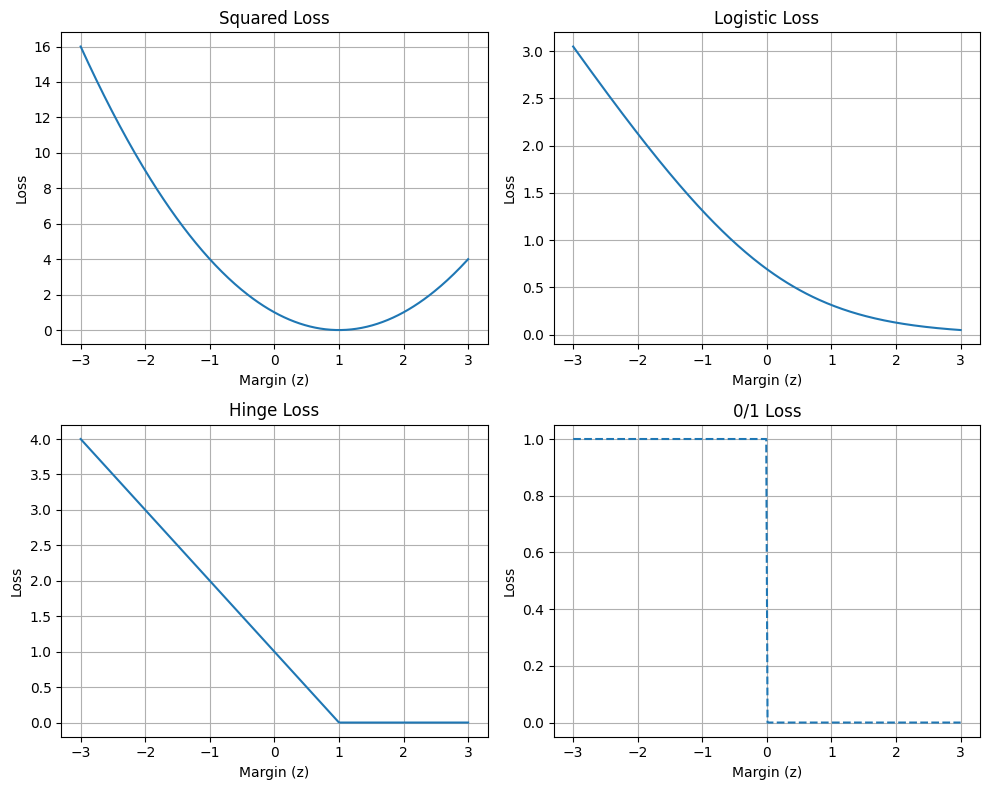

In [19]:
# Margin values and loss functions
z = np.linspace(-3, 3, 300)
squared_loss = (1 - z)**2
logistic_loss = np.log(1 + np.exp(-z))
hinge_loss = np.maximum(0, 1 - z)
zero_one_loss = (z < 0).astype(float)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Squared Loss
axs[0, 0].plot(z, squared_loss)
axs[0, 0].set_title('Squared Loss')
axs[0, 0].set_xlabel('Margin (z)')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].grid(True)

# Logistic Loss
axs[0, 1].plot(z, logistic_loss)
axs[0, 1].set_title('Logistic Loss')
axs[0, 1].set_xlabel('Margin (z)')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].grid(True)

# Hinge Loss
axs[1, 0].plot(z, hinge_loss)
axs[1, 0].set_title('Hinge Loss')
axs[1, 0].set_xlabel('Margin (z)')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].grid(True)

# 0/1 Loss
axs[1, 1].plot(z, zero_one_loss, linestyle='--')
axs[1, 1].set_title('0/1 Loss')
axs[1, 1].set_xlabel('Margin (z)')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [18]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#### Import Iris dataset and apply PCA to reduce the dimensionality of the data

In [ ]:
# 1. Load dataset and reduce to 2D
iris = load_iris()
X = iris.data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 4. Compute cost metrics
def compute_costs(X, labels, centers):
    km_cost = 0
    kmed_cost = 0
    kc_cost = 0
    for i in range(len(X)):
        center = centers[labels[i]]
        # Squared Euclidean distance for k-means cost
        dist_sq = np.sum((X[i] - center) ** 2)
        # Manhattan distance for k-median cost
        dist_abs = np.sum(np.abs(X[i] - center))
        km_cost += dist_sq
        kmed_cost += dist_abs
        # Euclidean distance for k-center cost (take max)
        kc_cost = max(kc_cost, np.sqrt(dist_sq))
    return km_cost, kmed_cost, kc_cost

#### K Means Clustering on Iris Dataset without Outliers

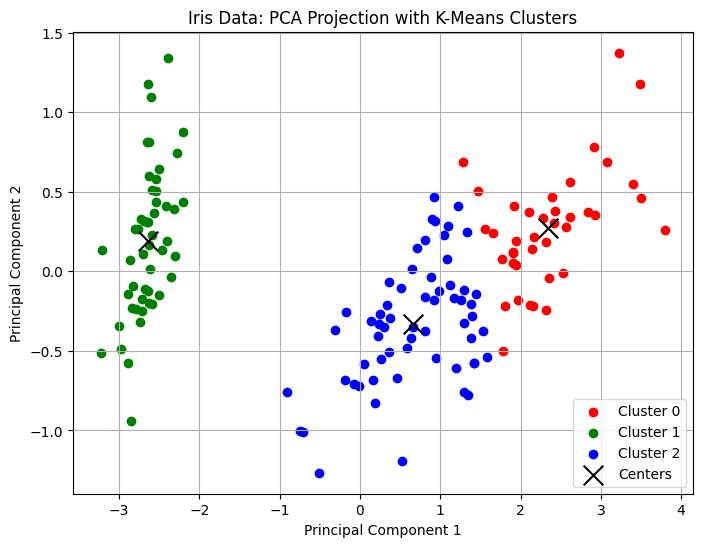

K-means cost (sum squared distances): 63.81994202200119
K-median cost (sum absolute distances): 104.83558248760393
K-center cost (max distance): 1.6284451748150686


In [9]:
# Apply K-means clustering (k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_reduced)
centers = kmeans.cluster_centers_


# Visualize clusters and centers
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X_reduced[labels==i, 0], X_reduced[labels==i, 1],
                color=colors[i], label=f'Cluster {i}')
plt.scatter(centers[:,0], centers[:,1], marker='x', s=200,
            c='black', label='Centers')
plt.title('Iris Data: PCA Projection with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()



km_cost, kmed_cost, kc_cost = compute_costs(X_reduced, labels, centers)
print("K-means cost (sum squared distances):", km_cost)
print("K-median cost (sum absolute distances):", kmed_cost)
print("K-center cost (max distance):", kc_cost)

#### Apply K Means Clustering on Iris Dataset with Outliers

In [ ]:
outliers = np.array([[8, 8], [-8, -8], [8, -8]])
X_outliers = np.vstack([X_reduced, outliers])

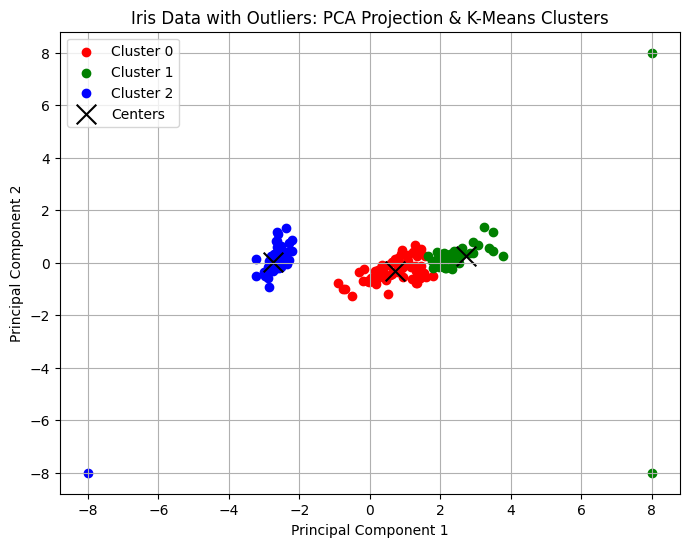

With Outliers:
K-means cost (sum squared distances): 345.29262989219313
K-median cost (sum absolute distances): 152.68679617223486
K-center cost (max distance): 9.794367355790992


In [14]:
# Re-run k-means clustering (using k=3 as before)
k = 3
kmeans_out = KMeans(n_clusters=k, random_state=42)
labels_out = kmeans_out.fit_predict(X_outliers)
centers_out = kmeans_out.cluster_centers_

# Visualize the clusters with outliers
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X_outliers[labels_out == i, 0],
                X_outliers[labels_out == i, 1],
                color=colors[i],
                label=f'Cluster {i}')
plt.scatter(centers_out[:, 0], centers_out[:, 1], marker='x', s=200,
            c='black', label='Centers')
plt.title('Iris Data with Outliers: PCA Projection & K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Compute cost metrics for the clustering with outliers
km_cost_out_, kmed_cost_out_, kc_cost_out_ = compute_costs(X_outliers, labels_out, centers_out)
print("With Outliers:")
print("K-means cost (sum squared distances):", km_cost_out_)
print("K-median cost (sum absolute distances):", kmed_cost_out_)
print("K-center cost (max distance):", kc_cost_out_)

In [17]:

print("%K-means cost increase:", 100*(km_cost_out_ - km_cost)/km_cost)
print("%K-median cost increase:", 100*(kmed_cost_out_ - kmed_cost)/kmed_cost)
print("%K-center cost increase:", 100*(kc_cost_out_ - kc_cost)/kc_cost)

%K-means cost increase: 441.0419046967442
%K-median cost increase: 45.64405762736999
%K-center cost increase: 501.45514919796256


#### K Means Clustering on 2D Gaussian Data

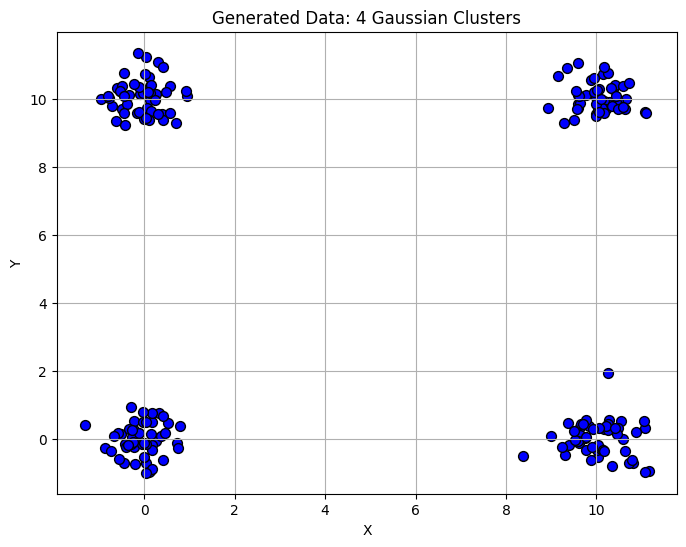

In [30]:
np.random.seed(42)

# Generate data: 4 Gaussian clusters (n=50 per cluster)
n = 50
means = np.array([[0, 0], [0, 10], [10, 0], [10, 10]])
sigma = 0.5
data = np.vstack([np.random.randn(n, 2) * sigma + m for m in means])

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.title('Generated Data: 4 Gaussian Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

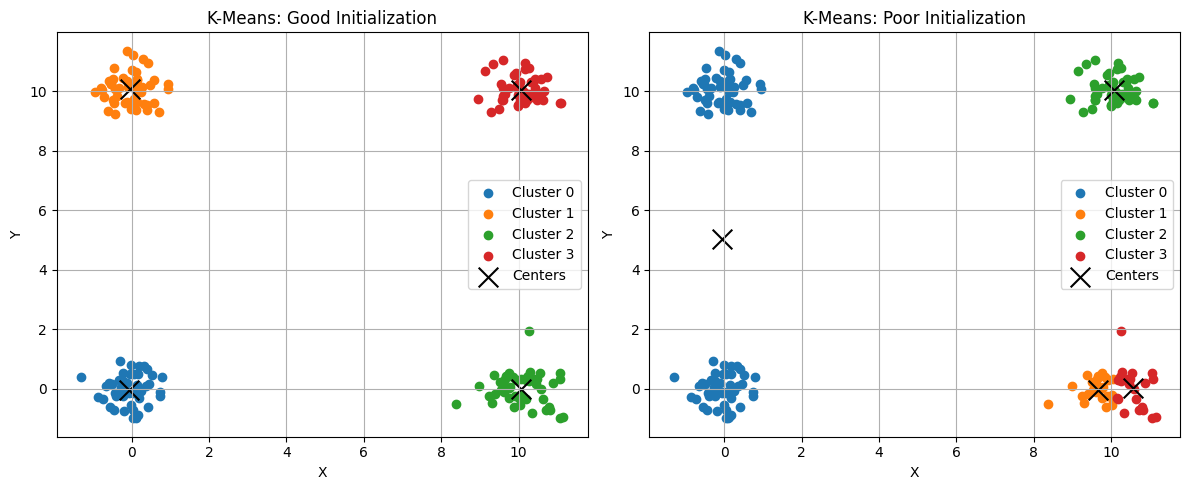

In [ ]:
# Use the true means as initial centers.
good_init = means.copy()
kmeans_good = KMeans(n_clusters=4, init=good_init, n_init=1, random_state=42)
labels_good = kmeans_good.fit_predict(data)
centers_good = kmeans_good.cluster_centers_

# Initialize with duplicates so not all clusters are covered.
poor_init = np.array([[0, 0], [0, 0], [10, 10], [10, 10]])
kmeans_poor = KMeans(n_clusters=4, init=poor_init, n_init=1, random_state=42)
labels_poor = kmeans_poor.fit_predict(data)
centers_poor = kmeans_poor.cluster_centers_

plt.figure(figsize=(12, 5))

# Good Initialization Plot
plt.subplot(1, 2, 1)
for i in range(4):
    plt.scatter(data[labels_good == i, 0], data[labels_good == i, 1], label=f'Cluster {i}')
plt.scatter(centers_good[:, 0], centers_good[:, 1], marker='x', s=200, c='black', label='Centers')
plt.title('K-Means: Good Initialization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Poor Initialization Plot
plt.subplot(1, 2, 2)
for i in range(4):
    plt.scatter(data[labels_poor == i, 0], data[labels_poor == i, 1], label=f'Cluster {i}')
plt.scatter(centers_poor[:, 0], centers_poor[:, 1], marker='x', s=200, c='black', label='Centers')
plt.title('K-Means: Poor Initialization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()